C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://

1185
2385
3585
5385
5985
6585
7185
9585
10785
11985
13185
13785
14385
14985
16185
17385
18585
19785
20985
22185
23385
24585
25785
26985
28185
29385
30585
31785
32985
34185
35385
36585
37785
40110
41310
42510
44910
46110
47310
48330
48345
49530
49545
50730
50745
51930
51945
53730
53745
54330
54345
56730
56745
57930
57945
59130
59145
61530
61545
62730
62745
63930
63945
65130
65145
66330
66345
67530
67545
68730
68745
69930
69945
71130
71145
72330
72345
73530
73545
74130
74145
74730
74745
75930
75945
77130
77145
78330
78345
79530
79545
80730
80745
81930
81945
83130
83145
84330
84345
86730
86745
87930
87945
89130
89145
90330
90345
92730
92745
93930
93945
95130
95145
96330
96345
97530
97545
98730
98745
99930
99945
101130
101145
104130
104145
104730
104745
105930
105945
107130
107145
108330
108345
110130
110145
111330
111345
111930
111945
114930
114945
116130
116145
117330
117345
119130
119145
122130
122145
123330
123345
124530
124545
126330
126345
126930
126945
127530
127545
128130
128145
12

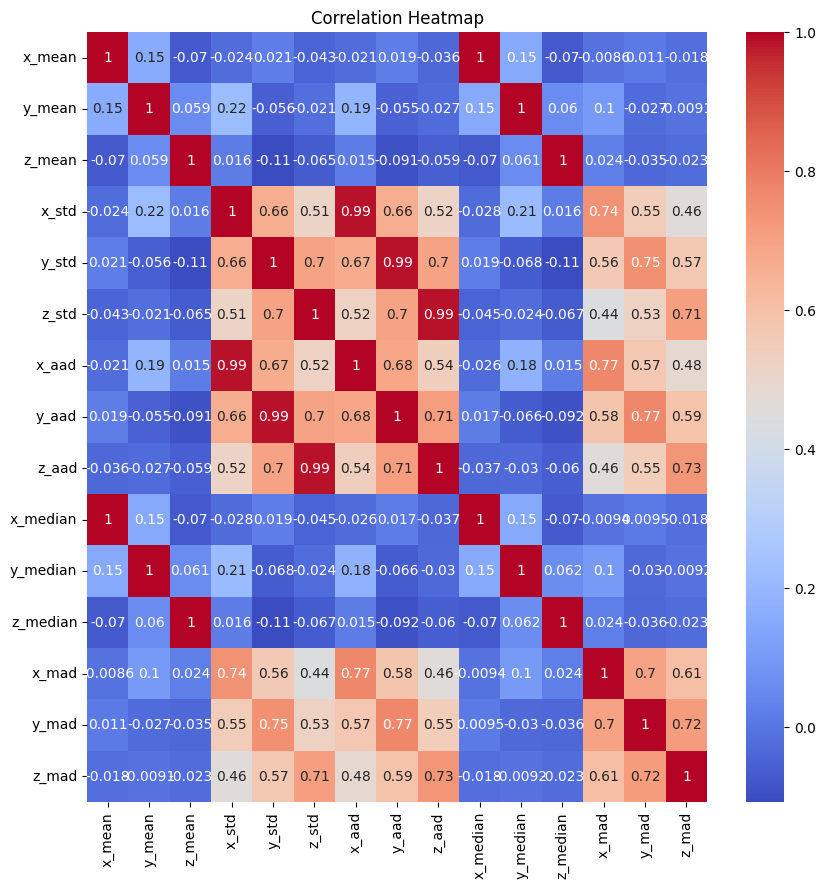

---------------------------
(10392, 41)
(4208, 41)
10392
4208


In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
import warnings
import array as arr
import shap
import os
from util import create_training_data, calculate_accelerometer_features, calculate_accelerometer_fft_features, create_training_data_NN, getCorr
from model import LRmodel, RFmodel, SVMmodel, GradientBoostingModel, NeuralNetworkModel
import joblib
import glob
import os
import cv2

# Change the current directory to the directory where the code is saved
os.chdir('./input_kichban')
np.bool = np.bool_
np.int = np.int_


data = pd.read_csv('totalData2.csv')
#  data test
data_test = pd.read_csv('new_nam.csv')

data['createdAt'] = data['createdAt'].str[:-38]
data_test['createdAt'] = data_test['createdAt'].str[:-38]


x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=30, step_size=15)
total_list_NN, train_labels_NN = create_training_data_NN(data=data)

# test
x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=30, step_size=15)
total_list_NN_test, train_labels_NN_test = create_training_data_NN(
    data=data_test)


features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=30)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=30)


# features = features.dropna(axis=0)
# print("000000000000000000000")
# print(nan_rows)
# features.fillna(0.001, inplace=True)
# features_test.fillna(0.001, inplace=True)

# print("features", features[800])


features_fft = calculate_accelerometer_fft_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=15)
# test
features_fft_test = calculate_accelerometer_fft_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=15)

# features_fft = features_fft.dropna(axis=0)
# features_fft_test = features_fft_test.dropna(axis=0)



features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft = features_fft[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

tran_corr = getCorr(features, ['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                               'y_aad', 'z_aad', "x_median", 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad'])


features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_test = features_test[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft_test = features_fft_test[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

print("---------------------------")
print(features.shape)
print(features_test.shape)
print(len(train_labels))
print(len(train_labels_test))





---------------------------
(10392, 70)
(4208, 70)
10392
4208
10392
4208
158748
158748
training time LRmodel complexity : 0.008999109268188477 s
Accuracy: 0.968393536121673

 -------------Classification LogisticRegression Report-------------

              precision    recall  f1-score   support

           1       0.99      0.94      0.96      1904
           2       0.86      1.00      0.93       535
           3       0.98      0.99      0.99      1610
           4       1.00      0.98      0.99       159

    accuracy                           0.97      4208
   macro avg       0.96      0.98      0.97      4208
weighted avg       0.97      0.97      0.97      4208

[[1787   85   32    0]
 [   0  535    0    0]
 [  13    0 1597    0]
 [   0    1    2  156]]


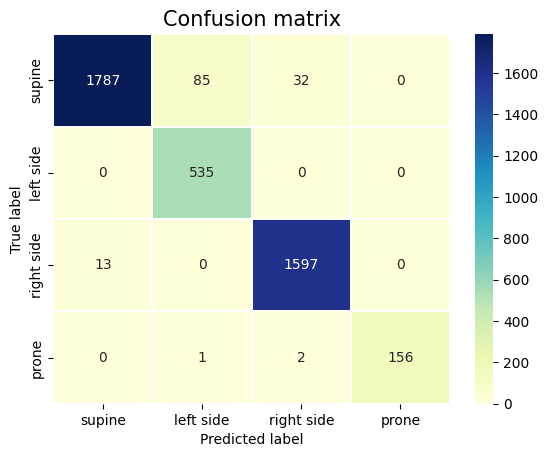

training time complexity : 0.8837242126464844 s
Accuracy: 0.9933460076045627

 -------------Classification RandomForestClassifier Report-------------

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1904
           2       0.98      1.00      0.99       535
           3       1.00      0.99      1.00      1610
           4       0.99      0.95      0.97       159

    accuracy                           0.99      4208
   macro avg       0.99      0.98      0.99      4208
weighted avg       0.99      0.99      0.99      4208

[[1893    9    0    2]
 [   0  535    0    0]
 [   9    0 1601    0]
 [   0    1    7  151]]


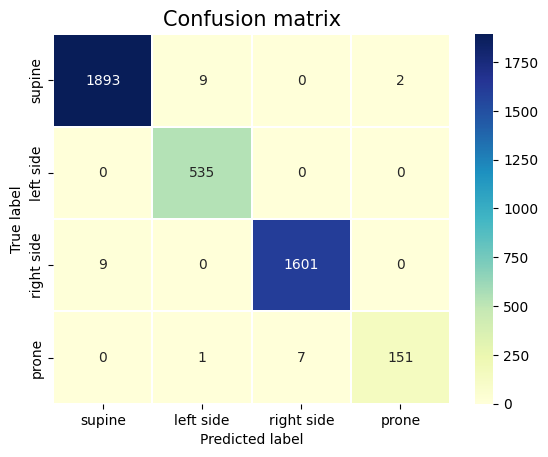

training time complexity : 0.06400227546691895 s
Accuracy: 0.9859790874524715

 -------------Classification SVM Report-------------

              precision    recall  f1-score   support

           1       1.00      0.98      0.99      1904
           2       0.97      1.00      0.99       535
           3       0.98      0.99      0.98      1610
           4       1.00      0.99      0.99       159

    accuracy                           0.99      4208
   macro avg       0.99      0.99      0.99      4208
weighted avg       0.99      0.99      0.99      4208

[[1869    0   35    0]
 [   1  534    0    0]
 [   8   13 1589    0]
 [   0    1    1  157]]


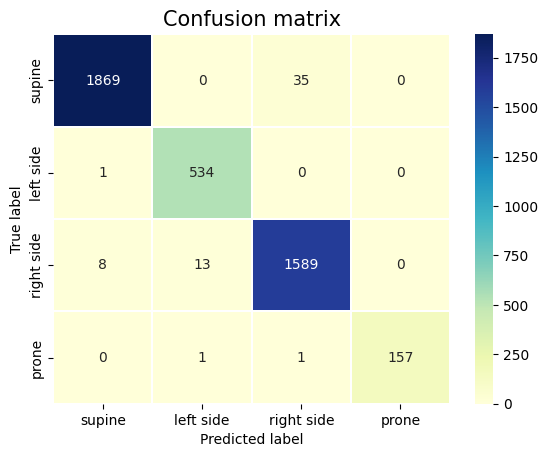

Training time complexity: 4.146519184112549 s
Accuracy: 0.9878802281368821

 -------------Classification Gradient Boosting Report-------------

              precision    recall  f1-score   support

           1       0.97      1.00      0.99      1904
           2       1.00      1.00      1.00       535
           3       1.00      0.97      0.98      1610
           4       1.00      0.99      0.99       159

    accuracy                           0.99      4208
   macro avg       0.99      0.99      0.99      4208
weighted avg       0.99      0.99      0.99      4208

[[1904    0    0    0]
 [   0  535    0    0]
 [  49    0 1561    0]
 [   0    1    1  157]]


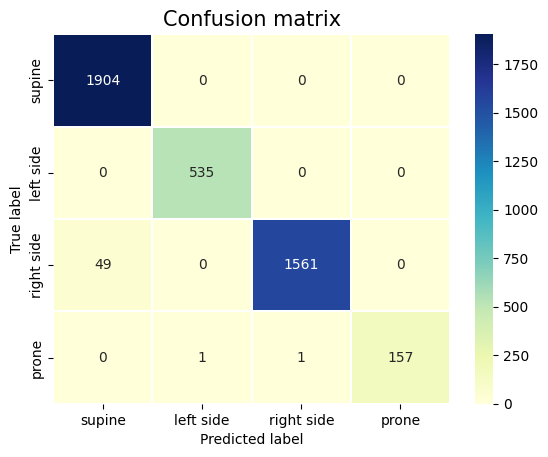

Training time complexity: 2.5077433586120605 s
Accuracy: 0.952174860665691

 -------------Classification Neural Network Report-------------

              precision    recall  f1-score   support

           1       0.93      0.97      0.95     29096
           2       0.91      1.00      0.95      8132
           3       1.00      0.91      0.95     24552
           4       0.99      0.97      0.98      2454

    accuracy                           0.95     64234
   macro avg       0.96      0.96      0.96     64234
weighted avg       0.95      0.95      0.95     64234

[[28281   768    15    32]
 [   12  8116     0     4]
 [ 2161     0 22391     0]
 [    0     0    80  2374]]


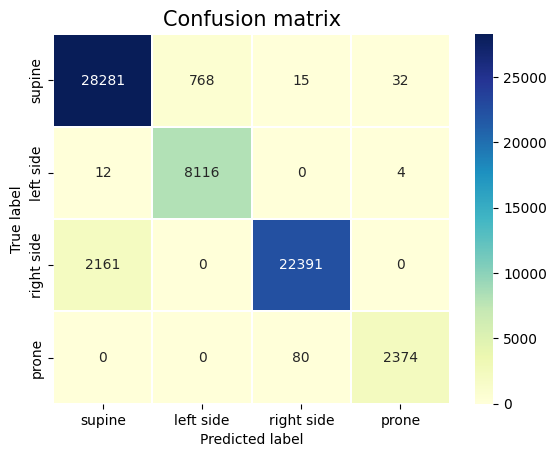

['full_nnM.dat']

In [2]:

features_all = pd.concat([features, features_fft], axis=1)

nan_rows = features_all.index[features_all.isnull().any(axis=1)]
features_all = features_all.dropna(axis=0)
train_labels2 = np.delete(train_labels, nan_rows)

features_all_test = pd.concat([features_test, features_fft_test], axis=1)

nan_rows_test = features_all_test.index[features_all_test.isnull().any(axis=1)]
features_all_test = features_all_test.dropna(axis=0)
train_labels_test_2 = np.delete(train_labels_test, nan_rows_test)


print("---------------------------")
print(features_all.shape)
print(features_all_test.shape)
print(len(train_labels2))
print(len(train_labels_test_2))
print(len(train_labels))
print(len(train_labels_test))

# train, test, labelTrain, labelTest = train_test_split(
#     features_all, train_labels, test_size=0.25, random_state=1)

# trainNN, testNN, labelTrainNN, labelTestNN = train_test_split(
#     total_list_NN, train_labels_NN, test_size=0.25, random_state=1)

train = features_all
test = features_all_test
labelTrain = train_labels2
labelTest = train_labels_test_2
trainNN = total_list_NN
testNN = total_list_NN_test
labelTrainNN = train_labels_NN
labelTestNN = train_labels_NN_test

print(len(trainNN))
print(len(labelTrainNN))

lr = LRmodel(train=train, test=test,
             labelTrain=labelTrain, labelTest=labelTest)
rfc = RFmodel(train=train, test=test,
              labelTrain=labelTrain, labelTest=labelTest)
svm_model = SVMmodel(train=train, test=test,
                     labelTrain=labelTrain, labelTest=labelTest)
gbM = GradientBoostingModel(train=train, test=test,
                            labelTrain=labelTrain, labelTest=labelTest)
nnM = NeuralNetworkModel(train=trainNN, test=testNN,
                         labelTrain=labelTrainNN, labelTest=labelTestNN)
joblib.dump(rfc, 'full_rfc.dat')
joblib.dump(lr, 'full_lr.dat')
joblib.dump(svm_model, 'full_svm_model.dat')
joblib.dump(gbM, 'full_gbM.dat')
joblib.dump(nnM, 'full_nnM.dat')

# explainer = shap.Explainer(rfc.predict, train)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(train)
# # Evaluate SHAP values
# shap.plots.bar(shap_values, max_display=50)

In [3]:
explainer = shap.Explainer(rfc.predict, train)
# Calculates the SHAP values - It takes some time
shap_values = explainer(train)
# Evaluate SHAP values
shap.plots.bar(shap_values, max_display=50)

Permutation explainer:  30%|███       | 3122/10392 [05:30<13:10,  9.20it/s]


KeyboardInterrupt: 